# Imports

In [1]:
import pycrp

import csv
import glob
import numpy as np
import matplotlib.pyplot as plt
import scipy
import joblib
import pandas as pd

No local midas libary installed


/Users/jasonyuan/Desktop/Physics/Thesis/Code/pycrp/_event.py:33: UserWarning: No MIDAS reader found. See readme for how to install a python MIDAS interface.
  warnings.warn("No MIDAS reader found. See readme for how to install a python MIDAS interface.")


In [2]:
def process_noise(filename, trace_length = 10000, channel = 1, fs = 1/(2.9992e-06 - 2.999E-06)):
    files = glob.glob(filename)
    
    noise = [] #empty list for traces

    for file in files: # Loop over all the traces
        # For one trace
        with open(file, newline='') as csvfile:
            data_file = csv.reader(csvfile, delimiter=' ', quotechar='|')
            trace_3 = []
            for row in data_file: #loop over the file to pull the traces 
                txt = ', '.join(row).split(",")
                if txt[0] == '':
                    data_x = txt[3:-1]

                    trace_3.append(float(data_x[channel]))


            noise.append(trace_3[0:trace_length])
    print("noise:",len(noise))
    print("tracelength:",len(trace_3))

    noise=np.array(noise)

    noise = {"preamp":noise}

    utrace=pycrp.Trace(noise,fs=fs)
    unoise=pycrp.Noise(noise,fs=fs,trace_weight=1e6,max_traces = 300)
    unoise.calc_psd()
    
    #PSDs_with_wire={"f":unoise.f,"PSDs":unoise.psds}
    return {"f":unoise.f,"PSDs":unoise.psds}


In [7]:
# PSD_short_coaxial = process_noise('preamp1006_short_coaxial/*.csv', trace_length = 10000, channel = 2)

# PSD_long_coaxial = process_noise('preamp1006_long_coaxial/*.csv', trace_length = 10000, channel = 2)

# PSD_no_coaxial = process_noise('preamp1005_no_coaxial/*.csv', trace_length = 10000, channel = 2)

PSD_improved_coaxial = process_noise('/Users/jasonyuan/Desktop/Physics/Thesis/Data/Noise Traces/October 21/MSO-X 4154A Trace Data Log 2022-10-21 12-58-11 0/*.csv',trace_length = 10000, channel = 1)
PSD_tiny_box = process_noise('/Users/jasonyuan/Desktop/Physics/Thesis/Data/Noise Traces/October 25/MSO-X 4154A Trace Data Log 2022-10-25 17-30-23 0/*.csv',trace_length = 10000, channel = 1)
PSD_old_box = process_noise('/Users/jasonyuan/Desktop/Physics/Thesis/Data/Noise Traces/October 25/MSO-X 4154A Trace Data Log 2022-10-25 17-12-58 oldbox/*.csv',trace_length = 10000, channel = 1)
# print(PSD_improved_coaxial)

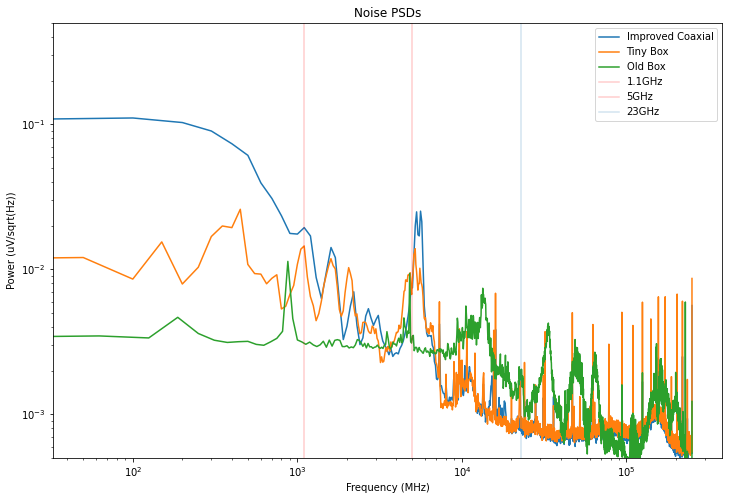

In [9]:
plt.figure(figsize=(12,8))
# plt.plot(PSD_short_coaxial["f"]/1e6, PSD_short_coaxial["PSDs"]["preamp"], label='Short coaxial cable',alpha=0.6)
# plt.plot(PSD_long_coaxial["f"]/1e6, PSD_long_coaxial["PSDs"]["preamp"], label='Long coaxial cable',alpha=0.6)
# plt.plot(PSD_no_coaxial["f"]/1e6, PSD_no_coaxial["PSDs"]["preamp"], label='Direct connect',alpha=0.4)
plt.plot(PSD_improved_coaxial['f']/1e6, PSD_improved_coaxial['PSDs']['preamp'], label='Improved Coaxial')
plt.plot(PSD_tiny_box['f']/1e6, PSD_tiny_box['PSDs']['preamp'], label='Tiny Box')
plt.plot(PSD_old_box['f']/1e6,PSD_old_box['PSDs']['preamp'], label='Old Box')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (uV/sqrt(Hz))')
plt.ylim(5e-4, 0.5)
plt.axvline(1.1e3, label='1.1GHz', alpha=0.2,color = "red")
plt.axvline(5e3, label='5GHz', alpha=0.2,color = "red")
plt.axvline(2.3e4, label='23GHz', alpha=0.2)
plt.title("Noise PSDs")
plt.legend()

plt.savefig('/Users/jasonyuan/Desktop/Noise_Data.pdf')

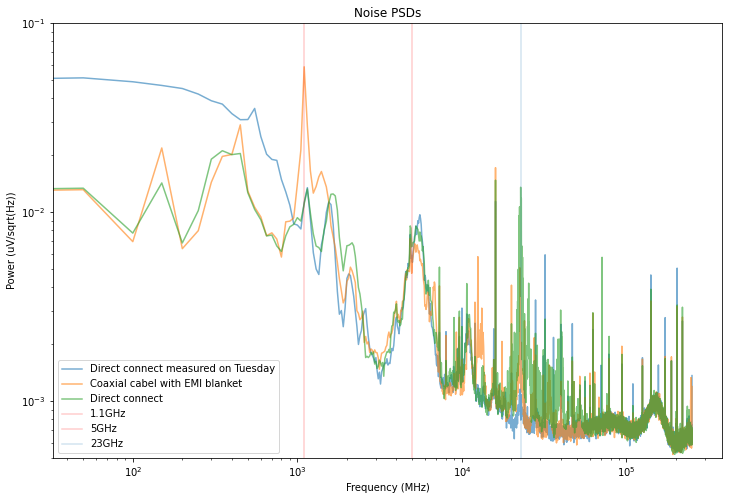

In [90]:
#freq, power = scipy.signal.periodogram(template['CH1']*10**6, fs=Fs)
plt.figure(figsize=(12,8))
#plt.plot(freq/1e6, power, label='Preamp')
plt.plot(PSDs_yesterday["f"]/1e6, PSDs_yesterday["PSDs"]["preamp"], label='Direct connect measured on Tuesday',alpha=0.6)
plt.plot(PSDs_without_blanket["f"]/1e6, PSDs_without_blanket["PSDs"]["preamp"], label='Coaxial cabel with EMI blanket',alpha=0.6)
plt.plot(PSDs_direct_connect["f"]/1e6, PSDs_direct_connect["PSDs"]["preamp"], label='Direct connect',alpha=0.6)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (uV/sqrt(Hz))')
plt.ylim(5e-4, 1e-1)
plt.axvline(1.1e3, label='1.1GHz', alpha=0.2,color = "red")
plt.axvline(5e3, label='5GHz', alpha=0.2,color = "red")
plt.axvline(2.3e4, label='23GHz', alpha=0.2)
plt.title("Noise PSDs")
plt.legend()

In [94]:
PSD_coaxial

{'f': array([0.0000e+00, 5.0000e+07, 1.0000e+08, ..., 2.4990e+11, 2.4995e+11,
        2.5000e+11]),
 'PSDs': {'preamp': array([3.92412963e-16, 2.40148630e-01, 2.32250614e-01, ...,
         8.64989251e-02, 9.02297910e-02, 1.80878673e+00])}}

In [65]:
files = glob.glob('preamp1005_coaxial_1/*.csv')

Fs = 1/(2.499e-08 - 2.4988E-08) #sampling frequency
pre_trig = 3000 #pretrigger length
post_trig = 3000 #posttrigger length
trace_length = pre_trig+post_trig

In [66]:
CH2 = []
CH3 = [] #empty list for traces
trigger_points_CH2 = []
trigger_points_CH3 = [] #empty list for trigger points

for file in files: # Loop over all the traces
    # For one trace
    with open(file, newline='') as csvfile:
        data_file = csv.reader(csvfile, delimiter=' ', quotechar='|')
        trace_2 = []
        trace_3 = []
        for row in data_file: #loop over the file to pull the traces 
            txt = ', '.join(row).split(",")
            if txt[0] == '':
                data_x = txt[3:-1]
                trace_2.append(float(data_x[1]))
                
                trace_3.append(float(data_x[2]))

                
        trace_2_filtered = scipy.ndimage.gaussian_filter(trace_2,sigma=10, order=0) #Filter each trace to find maximum point
        trace_3_filtered = scipy.ndimage.gaussian_filter(trace_3,sigma=10, order=0)
        trigger_pt_2 = np.argmin(trace_2_filtered)
        
        trigger_pt_3 = np.argmin(trace_2_filtered) #np.argmax(trace_3_filtered)
        
        if len(trace_2[(trigger_pt_2-pre_trig):(trigger_pt_2+post_trig)]) == trace_length and len(
            trace_3[(trigger_pt_3-pre_trig):(trigger_pt_3+post_trig)]) == trace_length: #Make sure the trace length is correct.
            CH2.append(trace_2[(trigger_pt_2-pre_trig):(trigger_pt_2+post_trig)])
            trigger_points_CH1.append(trigger_pt_2)
            
            CH3.append(trace_3[(trigger_pt_3-pre_trig):(trigger_pt_3+post_trig)])
            trigger_points_CH4.append(trigger_pt_3)
            
CH2=np.array(CH2)
CH3=np.array(CH3)

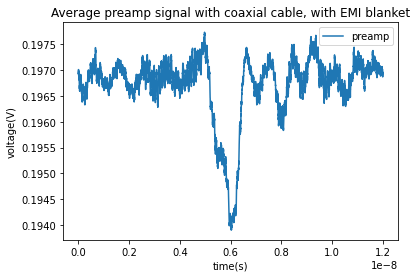

In [68]:
time = np.arange(len(CH2[0]))/Fs

#plt.plot(time, np.average(CH2,axis = 0),label = "trigger")
plt.plot(time, np.average(CH3,axis = 0),label = "preamp")
template = {"CH2":np.average(CH2,axis = 0), "CH3":np.average(CH3,axis = 0)}
plt.xlabel("time(s)")
plt.ylabel("voltage(V)")
plt.title("Average preamp signal with coaxial cable, with EMI blanket")
plt.legend()

No handles with labels found to put in legend.


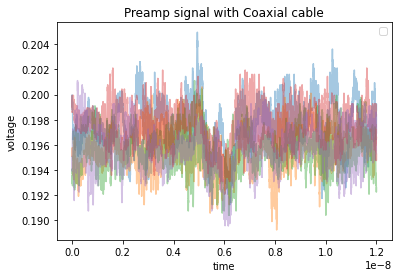

In [61]:
time = np.arange(len(CH1[0]))/Fs

for i in range(5):
    plt.plot(time,CH4[i],alpha = 0.4)

plt.xlabel("time")
plt.ylabel("voltage")
plt.title("Preamp signal with Coaxial cable")
plt.legend()

In [21]:
PSD_template = joblib.load("PSDs.joblib")

In [22]:
PSD_template

{'f': array([0.0000e+00, 5.0000e+07, 1.0000e+08, ..., 2.4990e+11, 2.4995e+11,
        2.5000e+11]),
 'PSDs': {'preamp': array([2.08847243e-14, 9.01170319e-02, 6.05917980e-02, ...,
         6.17852421e-03, 6.69407219e-03, 2.62239531e-01])}}

In [23]:
files = glob.glob('Preamp_on_CH2_no_wire/*.csv')

In [14]:
noise = [] #empty list for traces

for file in files: # Loop over all the traces
    # For one trace
    with open(file, newline='') as csvfile:
        data_file = csv.reader(csvfile, delimiter=' ', quotechar='|')
        trace_3 = []
        for row in data_file: #loop over the file to pull the traces 
            txt = ', '.join(row).split(",")
            if txt[0] == '':
                data_x = txt[3:-1]
                
                trace_3.append(float(data_x[1]))

            
        noise.append(trace_3[0:10000])

noise=np.array(noise)

noise = {"preamp":noise}

In [15]:
utrace=pycrp.Trace(noise,fs=Fs)
unoise=pycrp.Noise(noise,fs=Fs,trace_weight=1e6,max_traces = 300)
unoise.calc_psd()
PSD_template={"f":unoise.f,"PSDs":unoise.psds}

In [169]:
CH1 = []
trigger_points_CH1 = []

for file in files: # Loop over all the traces
    # For one trace
    with open(file, newline='') as csvfile:
        data_file = csv.reader(csvfile, delimiter=' ', quotechar='|')
        trace_2 = []
        for row in data_file: #loop over the file to pull the traces 
            txt = ', '.join(row).split(",")
            if txt[0] == '':
                data_x = txt[3:-1]
                trace_2.append(float(data_x[1]))

        
        trace_2_filtered = scipy.ndimage.gaussian_filter(trace_2,sigma=10, order=0) #Filter each trace to find maximum point
        
        if np.min(trace_2_filtered) < 3:
            trigger_pt_2 = np.argmin(trace_2_filtered)

            if len(trace_2[(trigger_pt_2-pre_trig):(trigger_pt_2+post_trig)]) == trace_length and len(
                trace_3[(trigger_pt_3-pre_trig):(trigger_pt_3+post_trig)]) == trace_length: #Make sure the trace length is correct.
                CH1.append(trace_2[(trigger_pt_2-pre_trig):(trigger_pt_2+post_trig)])
                trigger_points_CH1.append(trigger_pt_2)

            
CH1=np.array(CH1)

For time threshold=1 the output is 2.45V. time threshold = 500 output = 2.0V. Time threshold = 1023 output = 1.57V

In [166]:
len(CH1)

136

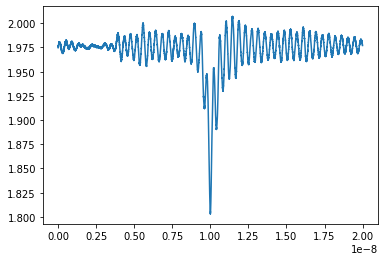

In [167]:
plt.plot(time, np.average(CH1,axis = 0),label = "preamp")

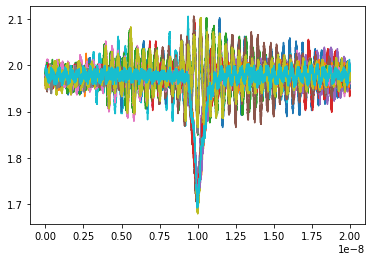

In [168]:
for i in range(20):
    plt.plot(time, CH1[i])

In [18]:
utrace=pycrp.Trace(noise,fs=Fs)
unoise=pycrp.Noise(noise,fs=Fs,trace_weight=1e6,max_traces = 300)
unoise.calc_psd()
PSDs_with_wire={"f":unoise.f,"PSDs":unoise.psds}



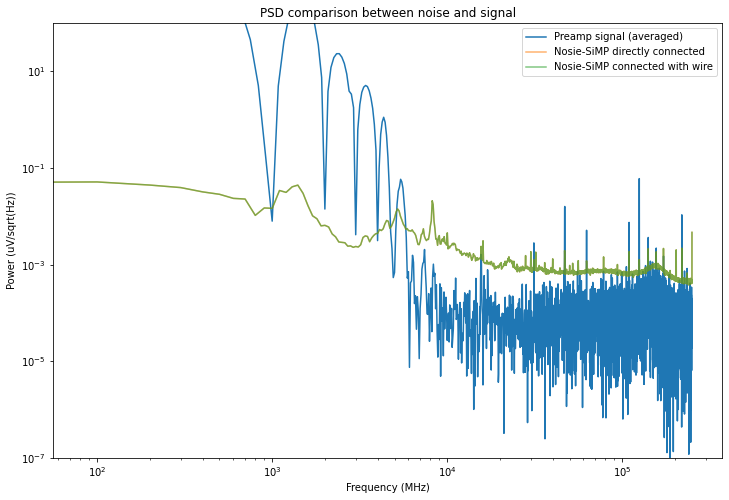

In [52]:
freq, power = scipy.signal.periodogram(template['CH1']*10**6, fs=Fs)
plt.figure(figsize=(12,8))
plt.plot(freq/1e6, power, label='Preamp signal (averaged)')
plt.plot(PSDs["f"]/1e6, PSDs["PSDs"]["preamp"], label='Nosie-SiMP directly connected',alpha=0.6)
plt.plot(PSDs_with_wire["f"]/1e6, PSDs_with_wire["PSDs"]["preamp"], label='Nosie-SiMP connected with wire',alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (uV/sqrt(Hz))')
plt.ylim(1e-7, 1e2)
plt.title("PSD comparison between noise and signal")
#plt.axvline(1e8, label='100MHz', alpha=0.6)
plt.legend()

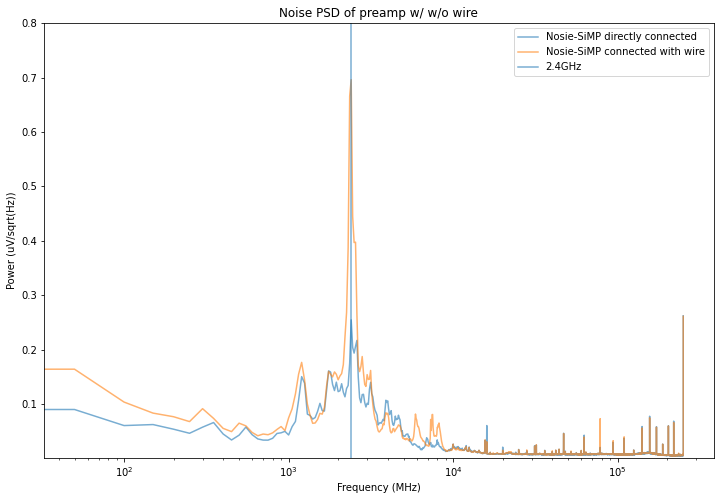

In [183]:

plt.figure(figsize=(12,8))
plt.plot(PSDs["f"]/1e6, PSDs["PSDs"]["preamp"], label='Nosie-SiMP directly connected',alpha=0.6)
plt.plot(PSDs_with_wire["f"]/1e6, PSDs_with_wire["PSDs"]["preamp"], label='Nosie-SiMP connected with wire',alpha=0.6)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (uV/sqrt(Hz))')
plt.ylim(1e-3, 0.8)
plt.title("Noise PSD of preamp w/ w/o wire")
plt.axvline(2400, label='2.4GHz', alpha=0.6)
plt.legend()

In [77]:
len(CH1)

58

In [115]:
time_shift_CH1 = []
amplitude_CH1 = []
time_shift_CH4 = []
amplitude_CH4 = []
for i in range(len(CH1)):
    OF = pycrp.OptimalFilter(fs = Fs)
    OFresult = OF.of_amp(S=CH1[i],N=PSDs["PSDs"]['CH1'],T=template['CH1'],fs=Fs,delay=25,
                         LPF=2e8,LPF_OFP=20e8,interpolate=False,return_all=True,
                         OFP_length=-1,OFP_threshold=0)
    time_shift_CH1.append(OFresult[2][2])
    amplitude_CH1.append(OFresult[2][0])
    OFresult = OF.of_amp(S=CH4[i],N=PSDs["PSDs"]['CH4'],T=template['CH4'],fs=Fs,delay=25,
                         LPF=2e8,LPF_OFP=20e8,interpolate=False,return_all=True,
                         OFP_length=-1,OFP_threshold=0)
    time_shift_CH4.append(OFresult[2][2])
    amplitude_CH4.append(OFresult[2][0])
    

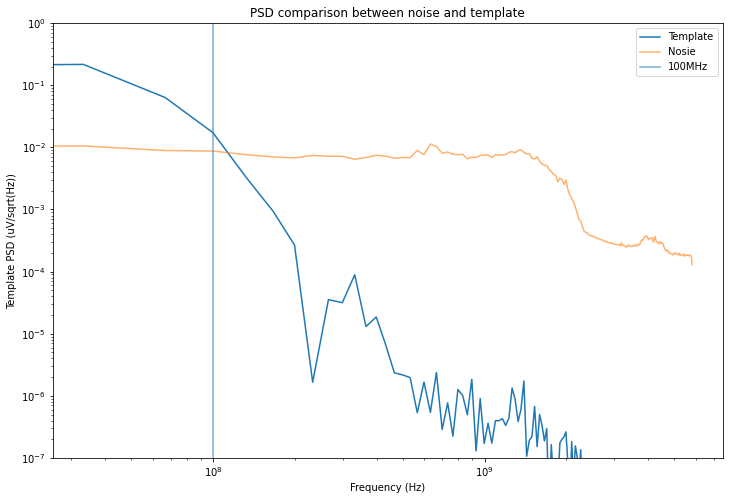

In [138]:
# this step decides the low pass filter frequency.
freq, power = scipy.signal.periodogram(template['CH1']*10**6, fs=Fs)
plt.figure(figsize=(12,8))
plt.plot(freq, power, label='Template')
plt.plot(freq, PSDs["PSDs"]["CH1"], label='Nosie',alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Template PSD (uV/sqrt(Hz))')
plt.ylim(1e-7, 1)
plt.title("PSD comparison between noise and template")
plt.axvline(1e8, label='100MHz', alpha=0.6)
plt.legend()

In [122]:
mask = (np.array(amplitude_CH1)>0.6) & (np.array(amplitude_CH4)>0.6)

delay = ((np.array(trigger_points_CH4)/Fs+np.array(time_shift_CH4))-(np.array(trigger_points_CH1)/Fs+np.array(time_shift_CH1)))[mask]

[1.42656250e-08 1.44546875e-08 1.46437500e-08 1.48328125e-08
 1.50218750e-08 1.52109375e-08 1.54000000e-08 1.55890625e-08
 1.57781250e-08 1.59671875e-08 1.61562500e-08] [10. 11. 14. 28. 41. 36. 17. 11.  3.  3.]
[15.14239074  0.32482125]


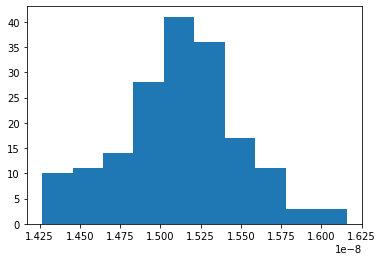

In [137]:
histgram = plt.hist(delay, bins = 10)
print(histgram[1],histgram[0])
print(pycrp.Fit.fitGaus_from_hist(histgram[0],histgram[1],interp_points=20)[0][1:4]*1e9)

In [79]:
# This step happens first
#Make noise template

files = glob.glob('noise_trace_snsl_sipm/*.csv')

pre_trig = 150
post_trig = 200

time = []
CH1 = []
CH4 = []
for file in files:
    with open(file, newline='') as csvfile:
        data_file = csv.reader(csvfile, delimiter=' ', quotechar='|')
        trace_1 = []
        trace_2 = []
        trace_3 = []
        for row in data_file:
            txt = ', '.join(row).split(",")
            if txt[0] == '':
                data_x = txt[3:-1]
                trace_1.append(float(data_x[0]))
                trace_2.append(float(data_x[1]))
                trace_3.append(float(data_x[2]))
        CH1.append(trace_2[(300-pre_trig):(300+post_trig)])
        CH4.append(trace_3[(300-pre_trig):(300+post_trig)])
CH1=np.array(CH1)
CH4=np.array(CH4)
traces = {"CH1": CH1, "CH4": CH4}

In [80]:
utrace=pycrp.Trace(traces,fs=Fs)
unoise=pycrp.Noise(traces,fs=Fs,trace_weight=1e6,max_traces = 100)
unoise.calc_psd()

In [81]:
PSDs={"f":unoise.f,"PSDs":unoise.psds}
joblib.dump(PSDs,"PSDs.joblib")

['PSDs.joblib']

# Thesis Figures

In [35]:
# Read in the desired pre-amp signal traces
pth_green = '/Users/jasonyuan/Desktop/Physics/Thesis/Thesis Figures/April 12 Noise Trace/Green Cable 2023-04-12 12-48-22 1/*.csv'
pth_blue = '/Users/jasonyuan/Desktop/Physics/Thesis/Thesis Figures/April 12 Noise Trace/Blue Cable v1 2023-04-12 12-52-50 2/*.csv'
pth_no_cable = '/Users/jasonyuan/Desktop/Physics/Thesis/Thesis Figures/April 12 Noise Trace/Direct Connect 2023-04-12 12-43-16 0/*.csv'

PSD_green_wire = process_noise(pth_green,trace_length = 50000, channel = 2)
PSD_blue_wire = process_noise(pth_blue,trace_length = 50000, channel = 2)
PSD_no_cable = process_noise(pth_no_cable,trace_length = 50000, channel = 2)

noise: 100
tracelength: 523
noise: 100
tracelength: 523
noise: 100
tracelength: 523


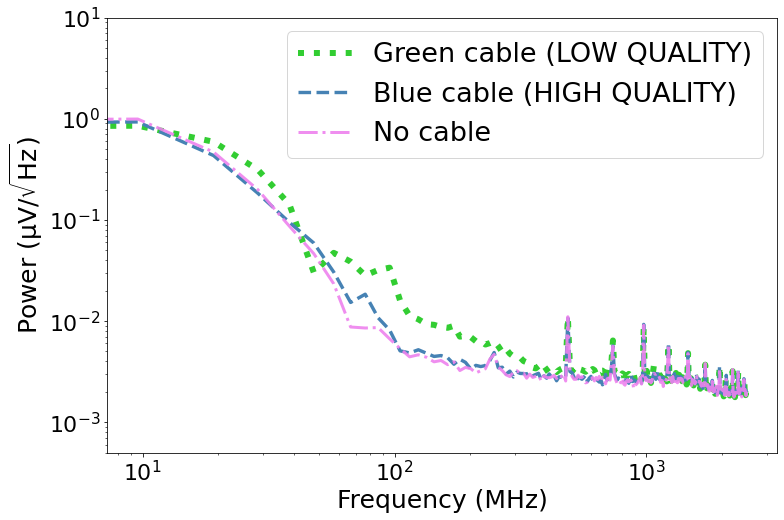

In [73]:
# Plot the noise PSDs for green wire, blue wire and direct connection
plt.figure(figsize=(12,8))
plt.plot(PSD_green_wire['f']/1e6, PSD_green_wire['PSDs']['preamp'], color='limegreen', linewidth=6, linestyle=':', alpha=1,
         label='Green cable (LOW QUALITY)')
plt.plot(PSD_blue_wire['f']/1e6, PSD_blue_wire['PSDs']['preamp'], color='steelblue', linewidth=3.4, linestyle='--', alpha=1,
         label='Blue cable (HIGH QUALITY)')
plt.plot(PSD_no_cable['f']/1e6,PSD_no_cable['PSDs']['preamp'], color='violet', linewidth=3, linestyle='-.', alpha=0.9,
          label='No cable')

plt.tick_params(axis='both', labelsize=22)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency (MHz)',fontsize=25)
plt.ylabel('Power ($\\rm \mu$V/$\sqrt{\\rm Hz}$)',fontsize=25)
plt.ylim(5e-4, 10)
# plt.axvline(1.1e3, label='1.1GHz', alpha=0.2,color = "red")
# plt.axvline(5e3, label='5GHz', alpha=0.2,color = "red")
# plt.axvline(2.3e4, label='23GHz', alpha=0.2)
# plt.title("Noise PSDs")
plt.legend(fontsize=27)

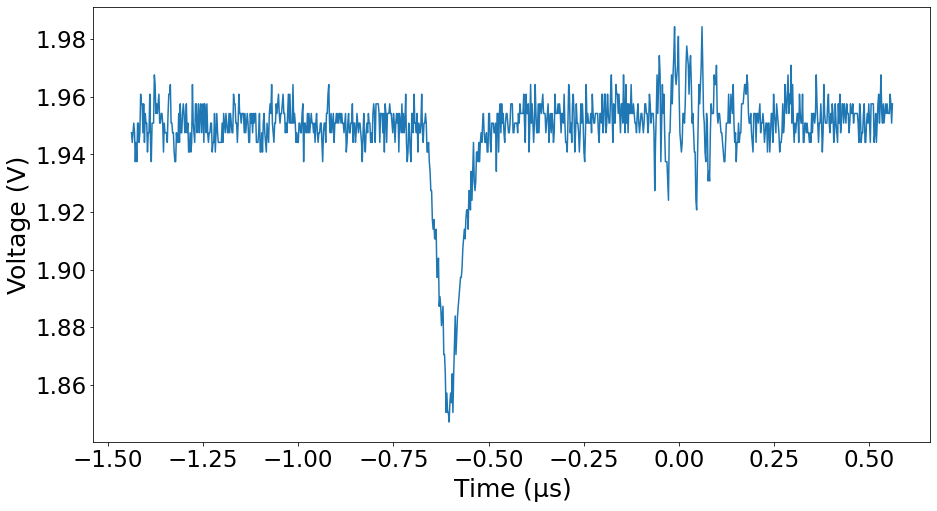

In [74]:
# Process the traces and plot a single pre-amp signal 
trace_pth = "/Users/jasonyuan/Desktop/Physics/Thesis/Data/Overall/Dec 6/MSO-X 4154A Trace Data Log 2022-12-06 16-37-10 2/*.csv"
files = glob.glob(trace_pth)

# --------------------------- TEST SECTION ------------------------------------- #
# # Test one file
# df = pd.read_csv(files[0],skiprows=1)   # Extract just the time column and the columns with VOLT 
# col_names = df.columns.values
# v_counter = 0
# for val in col_names:
#     if 'Time' in val:
#         t_header = val
#     if 'VOLT' in val and v_counter == 0:
#         v_header_1 = val
#         v_counter += 1
#     elif 'VOLT' in val and v_counter == 1:
#         v_header_2 = val
#         v_counter += 1

# sub_df = df.filter([t_header, v_header_1, v_header_2])    
# print(sub_df)
# np_df = sub_df.to_numpy()
# print(np_df[:,1].mean(),np_df[:,1].min())
# print(np_df[:,1].mean() - np_df[:,1].min())

# ---------------------------------------------------------------- #
num_traces = 200
trace_length = 1000
trace1 = []
trace2 = []

for i in range(0, len(files)):
    df = pd.read_csv(files[i],skiprows=1)   # Extract just the time column and the columns with VOLT 
    col_names = df.columns.values
    v_counter = 0
    for val in col_names:
        if 'Time' in val:
            t_header = val
        if 'VOLT' in val and v_counter == 0:
            v_header_1 = val
            v_counter += 1
        elif 'VOLT' in val and v_counter == 1:
            v_header_2 = val
            v_counter += 1

    sub_df = df.filter([t_header, v_header_1, v_header_2])    
    np_df = sub_df.to_numpy()

    if (np_df[:,1].mean() - np_df[:,1].min() > 0.08) and (np_df[:,2].mean() - np_df[:,2].min() > 0.08):
        trace1.append([np.copy(np_df[:,1].T)])
        trace2.append([np.copy(np_df[:,2].T)])

trace1 = np.array(trace1).squeeze()
trace2 = np.array(trace2).squeeze()
t_array = 1e6 * (pd.read_csv(files[0],skiprows=1).filter([t_header]).to_numpy().reshape((-1,)))   # Convert into microseconds
tof_array = []

for n in range(0, trace1.shape[0]):
    t1_min = trace1[n,:].argmin()
    t2_min = trace2[n,:].argmin()
    tof_array.append(t_array[t2_min]-t_array[t1_min])

%matplotlib inline
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,1,1)
# ax2 = fig.add_subplot(1,2,2)
# for n in range(0,trace1.shape[0]):
#     ax1.plot(t_array,trace1[n,:],label=n)
#     ax1.plot(t_array,trace2[n,:],label=n)

ax1.plot(t_array,trace1[100,:],label='100')
# ax1.plot(t_array,trace2[100,:],label='100')

# n, bins, _ = ax2.hist(tof_array,bins=100)
# plt.plot(t_array,trace2,label='Trace 2')
# plt.legend()
ax1.tick_params(axis='both', labelsize=23)
ax1.set_xlabel('Time (${\\rm \mu}$s)',fontsize=25)
ax1.set_ylabel('Voltage (V)',fontsize=25)
plt.show()

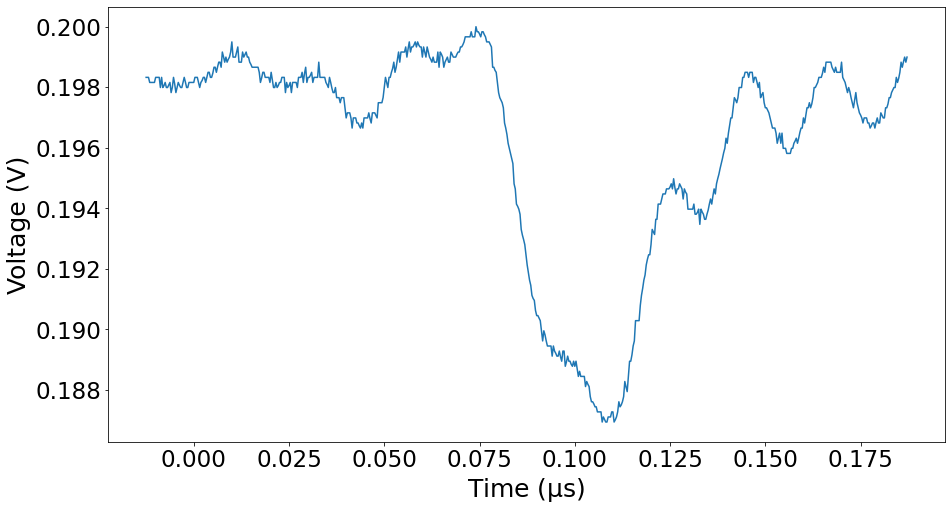

In [44]:
# Process the traces and plot a single pre-amp signal 
trace_pth = "/Users/jasonyuan/Desktop/Physics/Thesis/Thesis Figures/April 12 Noise Trace/Green Cable 2023-04-12 12-48-22 1/*.csv"
files = glob.glob(trace_pth)

trace1 = []
trace2 = []

for i in range(0, len(files)):
    df = pd.read_csv(files[i],skiprows=1)   # Extract just the time column and the columns with VOLT 
    col_names = df.columns.values
    v_counter = 0
    for val in col_names:
        if 'Time' in val:
            t_header = val
        if 'VOLT' in val and v_counter == 0:
            v_header_1 = val
            v_counter += 1
        elif 'VOLT' in val and v_counter == 1:
            v_header_2 = val
            v_counter += 1

    sub_df = df.filter([t_header, v_header_1, v_header_2])    
    np_df = sub_df.to_numpy()

    # if (np_df[:,1].mean() - np_df[:,1].min() > 0.08) and (np_df[:,2].mean() - np_df[:,2].min() > 0.08):
    trace1.append([np.copy(np_df[:,1].T)])
    trace2.append([np.copy(np_df[:,2].T)])

trace1 = np.array(trace1).squeeze()
trace2 = np.array(trace2).squeeze()
t_array = 1e6 * (pd.read_csv(files[0],skiprows=1).filter([t_header]).to_numpy().reshape((-1,)))   # Convert into microseconds
tof_array = []

for n in range(0, trace1.shape[0]):
    t1_min = trace1[n,:].argmin()
    t2_min = trace2[n,:].argmin()
    tof_array.append(t_array[t2_min]-t_array[t1_min])

%matplotlib inline
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,1,1)

ax1.plot(t_array,trace2[87,:],label='100')

ax1.tick_params(axis='both', labelsize=23)
ax1.set_xlabel('Time (${\\rm \mu}$s)',fontsize=25)
ax1.set_ylabel('Voltage (V)',fontsize=25)
plt.show()

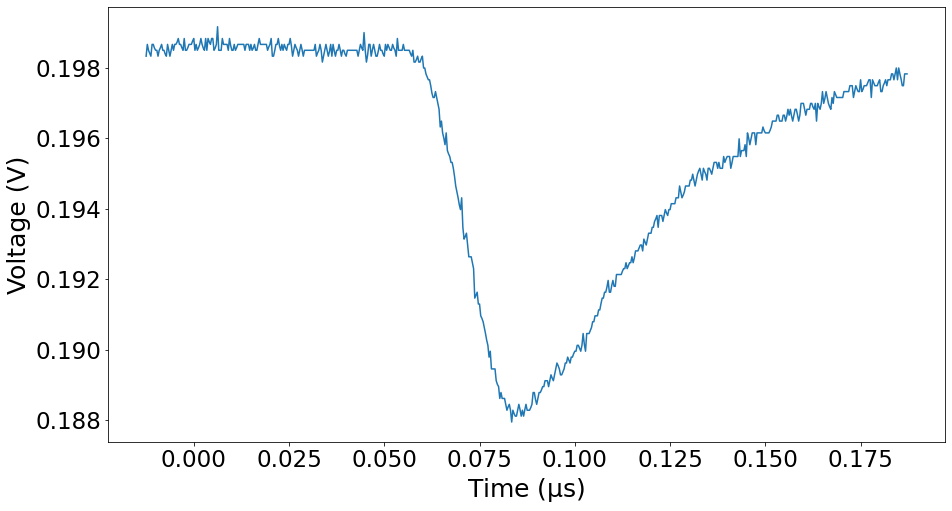

In [19]:
# Process the traces and plot a single pre-amp signal 
trace_pth = "/Users/jasonyuan/Desktop/Physics/Thesis/Thesis Figures/April 12 Noise Trace/Blue Cable v2 2023-04-12 12-57-34 3/*.csv"
files = glob.glob(trace_pth)

trace1 = []
trace2 = []

for i in range(0, len(files)):
    df = pd.read_csv(files[i],skiprows=1)   # Extract just the time column and the columns with VOLT 
    col_names = df.columns.values
    v_counter = 0
    for val in col_names:
        if 'Time' in val:
            t_header = val
        if 'VOLT' in val and v_counter == 0:
            v_header_1 = val
            v_counter += 1
        elif 'VOLT' in val and v_counter == 1:
            v_header_2 = val
            v_counter += 1

    sub_df = df.filter([t_header, v_header_1, v_header_2])    
    np_df = sub_df.to_numpy()

    # if (np_df[:,1].mean() - np_df[:,1].min() > 0.08) and (np_df[:,2].mean() - np_df[:,2].min() > 0.08):
    trace1.append([np.copy(np_df[:,1].T)])
    trace2.append([np.copy(np_df[:,2].T)])

trace1 = np.array(trace1).squeeze()
trace2 = np.array(trace2).squeeze()
t_array = 1e6 * (pd.read_csv(files[0],skiprows=1).filter([t_header]).to_numpy().reshape((-1,)))   # Convert into microseconds
tof_array = []

for n in range(0, trace1.shape[0]):
    t1_min = trace1[n,:].argmin()
    t2_min = trace2[n,:].argmin()
    tof_array.append(t_array[t2_min]-t_array[t1_min])

%matplotlib inline
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,1,1)

ax1.plot(t_array,trace2[5,:],label='100')

ax1.tick_params(axis='both', labelsize=23)
ax1.set_xlabel('Time (${\\rm \mu}$s)',fontsize=25)
ax1.set_ylabel('Voltage (V)',fontsize=25)
plt.show()

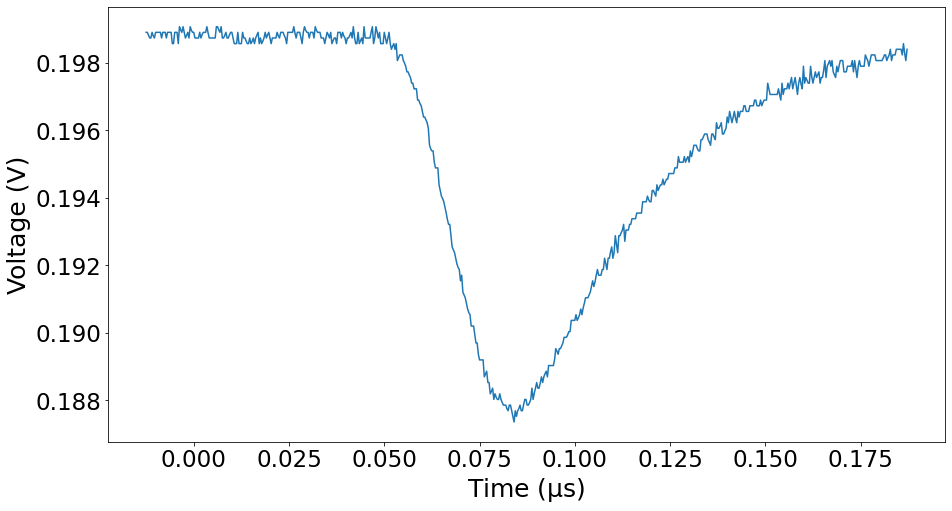

In [18]:
# Process the traces and plot a single pre-amp signal 
trace_pth = "/Users/jasonyuan/Desktop/Physics/Thesis/Thesis Figures/April 12 Noise Trace/Direct Connect 2023-04-12 12-43-16 0/*.csv"
files = glob.glob(trace_pth)

trace1 = []
trace2 = []

for i in range(0, len(files)):
    df = pd.read_csv(files[i],skiprows=1)   # Extract just the time column and the columns with VOLT 
    col_names = df.columns.values
    v_counter = 0
    for val in col_names:
        if 'Time' in val:
            t_header = val
        if 'VOLT' in val and v_counter == 0:
            v_header_1 = val
            v_counter += 1
        elif 'VOLT' in val and v_counter == 1:
            v_header_2 = val
            v_counter += 1

    sub_df = df.filter([t_header, v_header_1, v_header_2])    
    np_df = sub_df.to_numpy()

    # if (np_df[:,1].mean() - np_df[:,1].min() > 0.08) and (np_df[:,2].mean() - np_df[:,2].min() > 0.08):
    trace1.append([np.copy(np_df[:,1].T)])
    trace2.append([np.copy(np_df[:,2].T)])

trace1 = np.array(trace1).squeeze()
trace2 = np.array(trace2).squeeze()
t_array = 1e6 * (pd.read_csv(files[0],skiprows=1).filter([t_header]).to_numpy().reshape((-1,)))   # Convert into microseconds
tof_array = []

for n in range(0, trace1.shape[0]):
    t1_min = trace1[n,:].argmin()
    t2_min = trace2[n,:].argmin()
    tof_array.append(t_array[t2_min]-t_array[t1_min])

%matplotlib inline
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,1,1)

ax1.plot(t_array,trace2[1,:],label='100')

ax1.tick_params(axis='both', labelsize=23)
ax1.set_xlabel('Time (${\\rm \mu}$s)',fontsize=25)
ax1.set_ylabel('Voltage (V)',fontsize=25)
plt.show()